In [53]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0,'../modules')
import phantom
import cooling

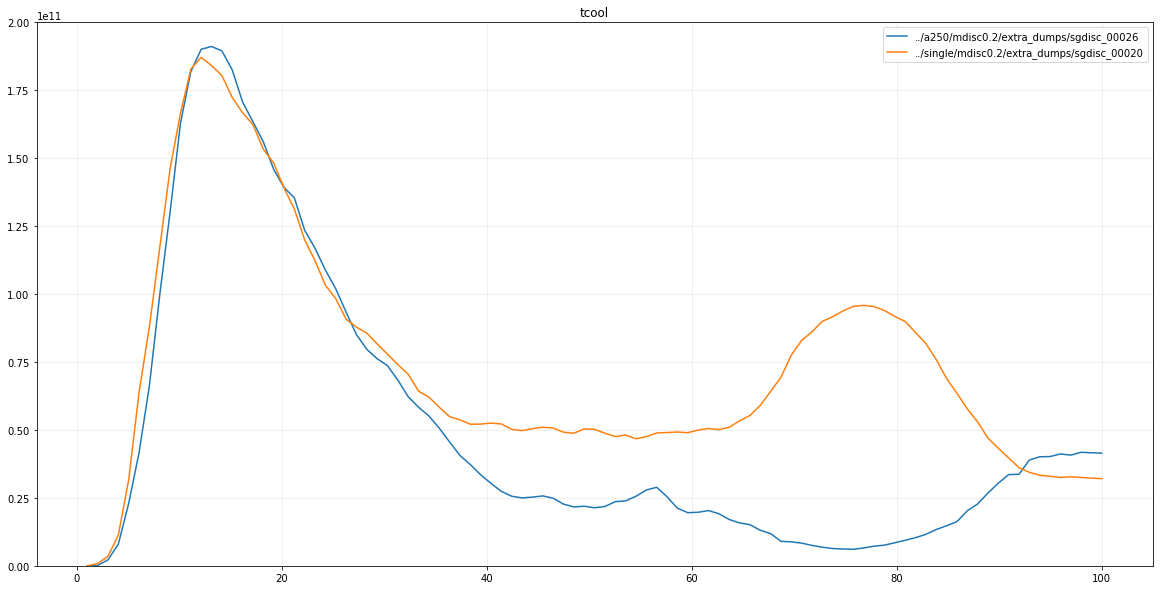

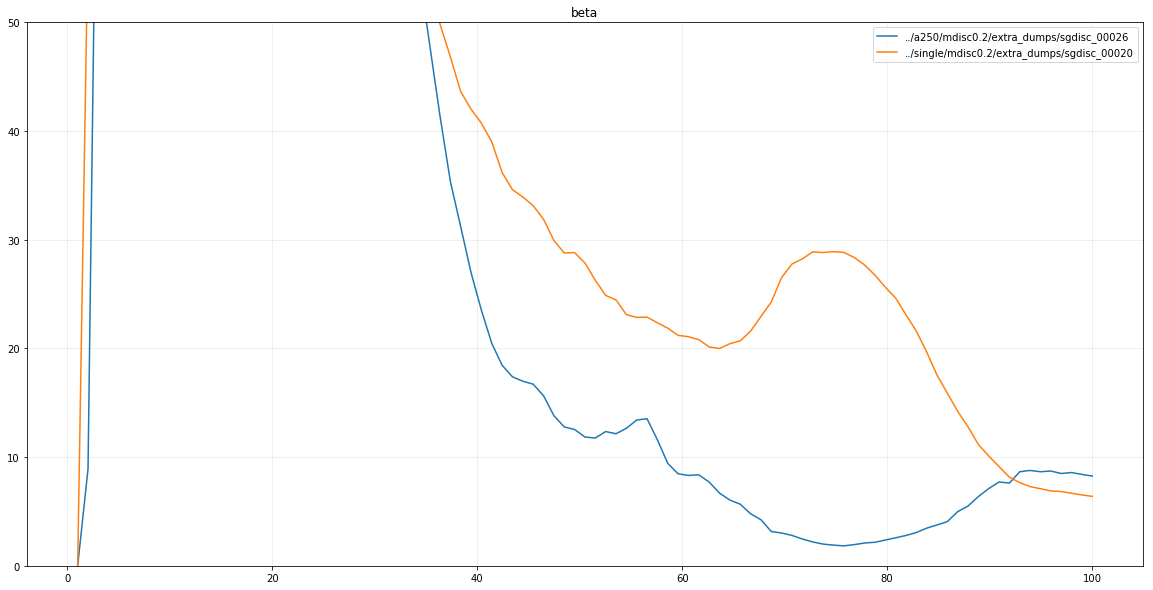

In [144]:
dumps = [
        '../a250/mdisc0.2/extra_dumps/sgdisc_00026',
        '../single/mdisc0.2/extra_dumps/sgdisc_00020'
        ]

for dump in dumps:
    fid = phantom.folder_id(dump)
    # read dump
    disc = phantom.read_dump_file(dump)
    # get azimuthally averaged disc properties from pyphantom disc instance
    az_averaged_properties = phantom.get_az_averaged_properties(disc)
    tcool = cooling.polytropic_cooling(az_averaged_properties,verbose=False)

    plt.figure('tcool',figsize=(20,10))
    plt.plot(out['r'],tcool,label=dump)
    plt.ylim([0,2e11])
    plt.title('tcool')
    plt.grid(alpha=0.25)
    plt.legend()

    plt.figure('beta',figsize=(20,10))
    plt.plot(out['r'],tcool*out['omega'],label=dump)
    plt.ylim([0,50])
    plt.title('beta')
    plt.grid(alpha=0.25)
    plt.legend()
plt.show()